# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Receiving objects: 100% (10/10), 11.01 MiB | 12.51 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

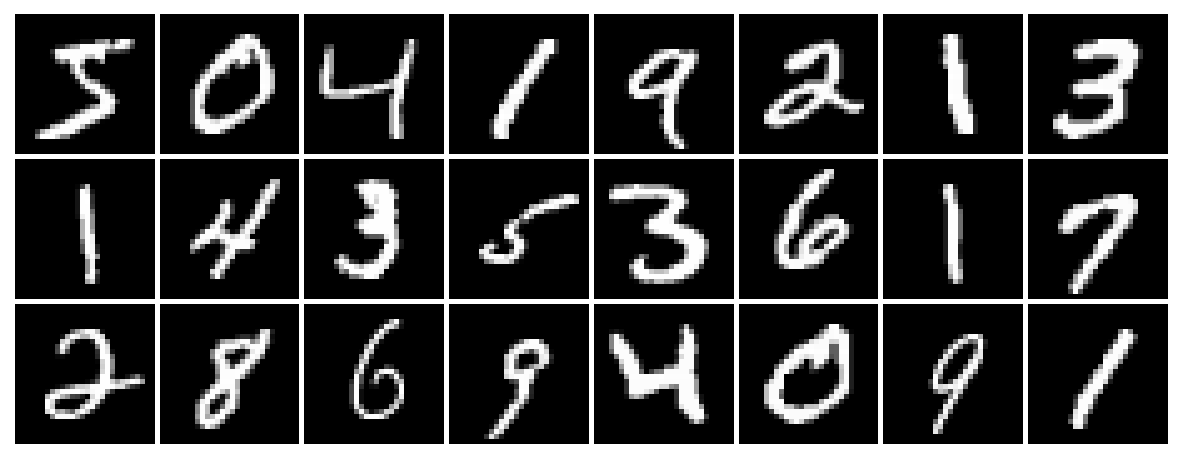

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


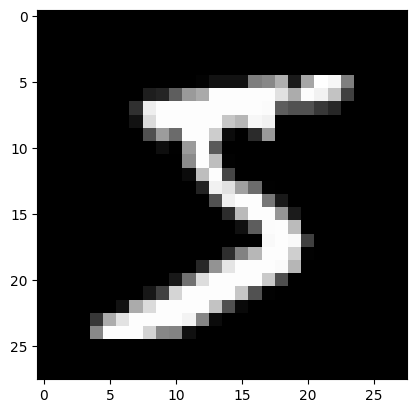

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

- A rede tem 28\*28\*10 + 10 parâmetros. O 10 é de bias
- 7850 parâmetros

### Testando um predict com poucas amostras

In [10]:
# convertendo em uma única linha de 784 posições, com a função view
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.0469, -0.0899, -0.1729, -0.1449,  0.0190, -0.0432,  0.2310,  0.1916,
         -0.1422,  0.0898],
        [ 0.1280, -0.3247, -0.4667, -0.1139, -0.0837,  0.2247,  0.2540, -0.0242,
         -0.3149,  0.2830],
        [ 0.3024, -0.1212, -0.0119,  0.0017, -0.0744,  0.1433,  0.1691,  0.2180,
         -0.0014,  0.0754],
        [ 0.3452, -0.2170,  0.0922, -0.1961,  0.1375, -0.0074, -0.0222,  0.0777,
          0.1168,  0.0967],
        [-0.0034, -0.4054, -0.2320, -0.1967, -0.0441,  0.2458,  0.0692, -0.0044,
          0.3156, -0.0722]], grad_fn=<AddmmBackward0>)

In [11]:
xin

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [12]:
import torch.nn.functional as F
# obtendo as probabilidades
F.softmax(score, dim=1) * 100

tensor([[10.3994,  9.0696,  8.3476,  8.5843, 10.1130,  9.5034, 12.5011, 12.0180,
          8.6080, 10.8556],
        [11.5121,  7.3205,  6.3519,  9.0386,  9.3161, 12.6807, 13.0588,  9.8867,
          7.3928, 13.4417],
        [12.5104,  8.1902,  9.1365,  9.2614,  8.5827, 10.6700, 10.9488, 11.4975,
          9.2325,  9.9701],
        [13.3740,  7.6225, 10.3845,  7.7832, 10.8658,  9.4001,  9.2614, 10.2344,
         10.6427, 10.4315],
        [10.0853,  6.7467,  8.0245,  8.3125,  9.6829, 12.9390, 10.8443, 10.0757,
         13.8743,  9.4148]], grad_fn=<MulBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [13]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [14]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-nw2xe3tb
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-nw2xe3tb
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.10

In [15]:
from torchviz import make_dot, make_dot_from_trace
# predict
y_pred = model(Variable(x_train.view(-1,28*28)))
# loss
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3427, grad_fn=<NllLossBackward0>)

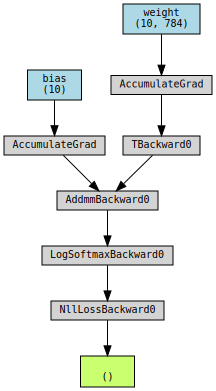

In [16]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [17]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    # vetor de score
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # vetor de perdas
    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [18]:
print('Final loss:', loss.item())

Final loss: 0.26529839634895325


### Visualizando gráfico de perda durante o treinamento

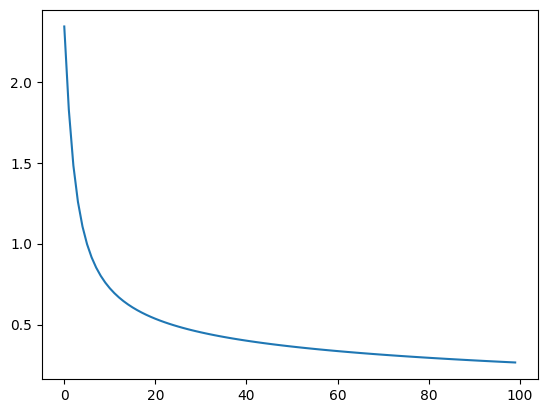

In [19]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [20]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.942


- É uma acurácia alta, mas não tanto para esse problema.

### Matriz de confusão com dados de treinamento e teste

In [21]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,2,1,0
2,0,1,91,1,0,1,1,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,2,0,2,0,3
5,0,2,0,1,0,81,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,2,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


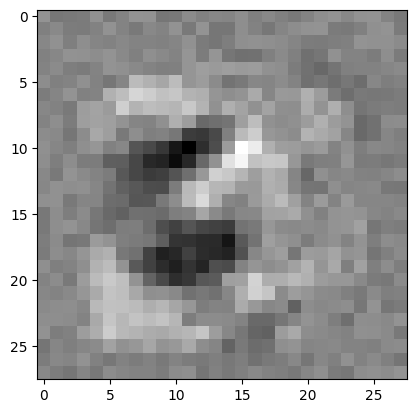

In [22]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

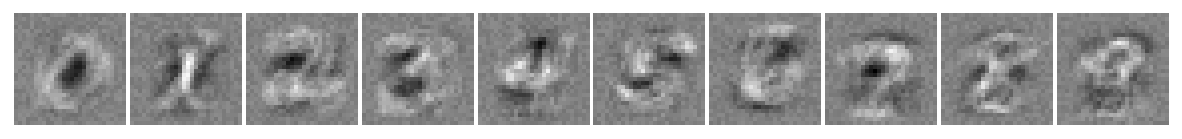

In [23]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

Época: 1/100 - perda: 0.10635865479707718 - acurácia: 0.992


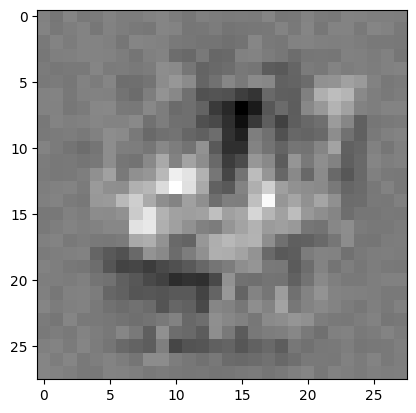

Época: 2/100 - perda: 0.10613519698381424 - acurácia: 0.992


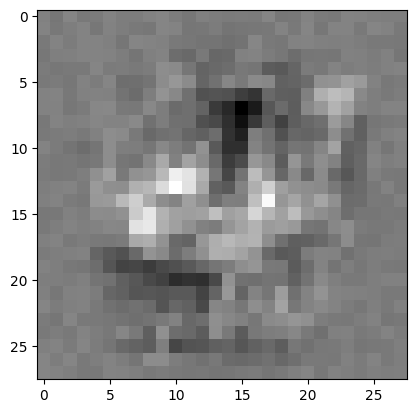

Época: 3/100 - perda: 0.10591259598731995 - acurácia: 0.992


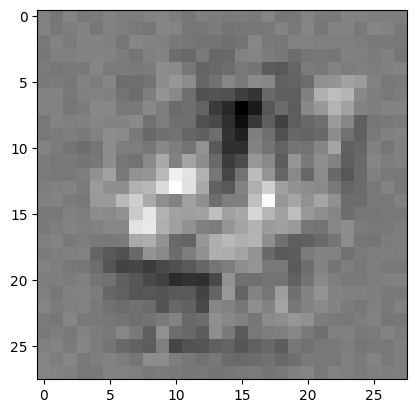

Época: 4/100 - perda: 0.10569082945585251 - acurácia: 0.992


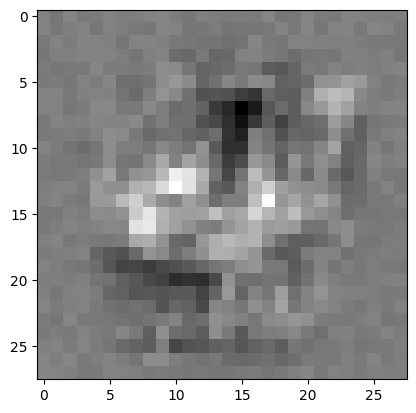

Época: 5/100 - perda: 0.10546990483999252 - acurácia: 0.992


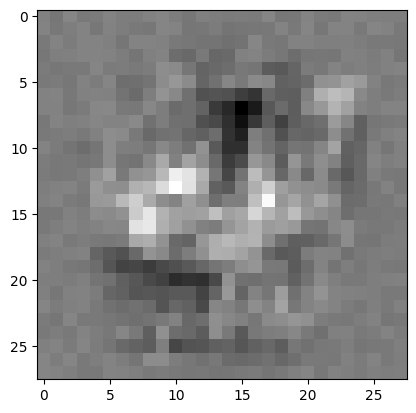

Época: 6/100 - perda: 0.1052497997879982 - acurácia: 0.992


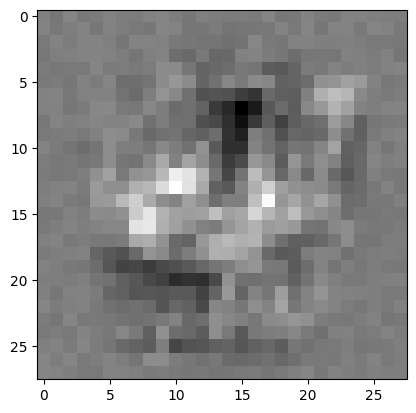

Época: 7/100 - perda: 0.10503052920103073 - acurácia: 0.992


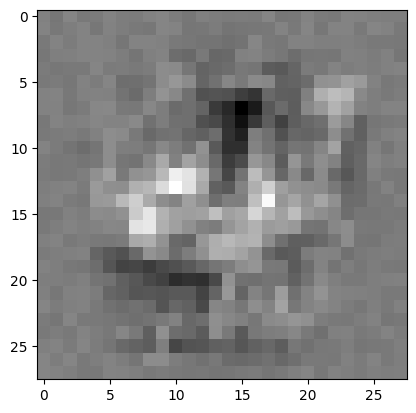

Época: 8/100 - perda: 0.10481209307909012 - acurácia: 0.992


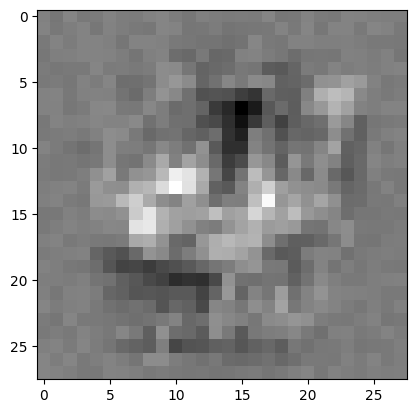

Época: 9/100 - perda: 0.10459447652101517 - acurácia: 0.992


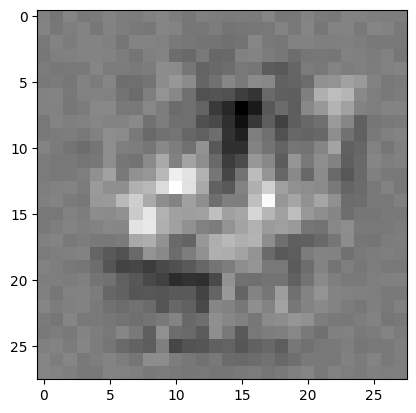

Época: 10/100 - perda: 0.10437767952680588 - acurácia: 0.992


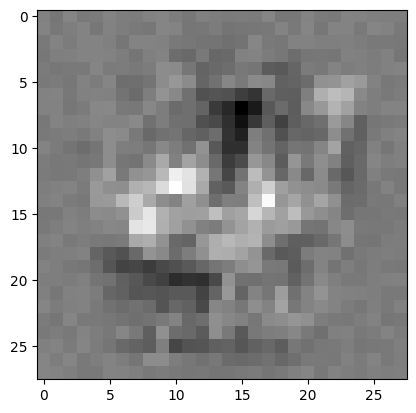

Época: 11/100 - perda: 0.10416167229413986 - acurácia: 0.992


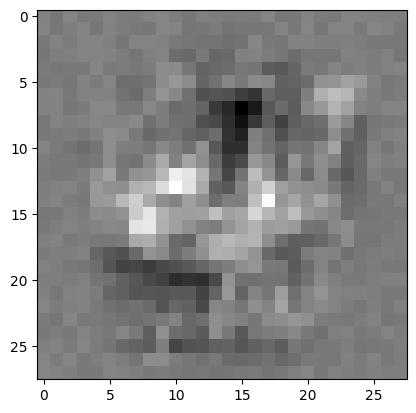

Época: 12/100 - perda: 0.10394647717475891 - acurácia: 0.992


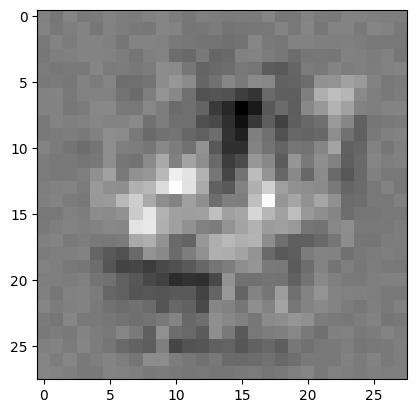

Época: 13/100 - perda: 0.10373210161924362 - acurácia: 0.992


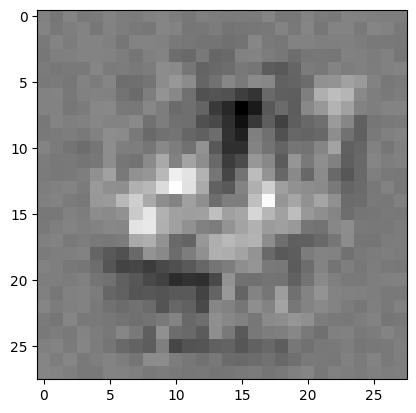

Época: 14/100 - perda: 0.1035185158252716 - acurácia: 0.992


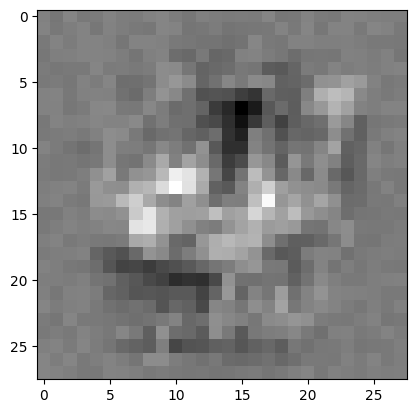

Época: 15/100 - perda: 0.10330571979284286 - acurácia: 0.992


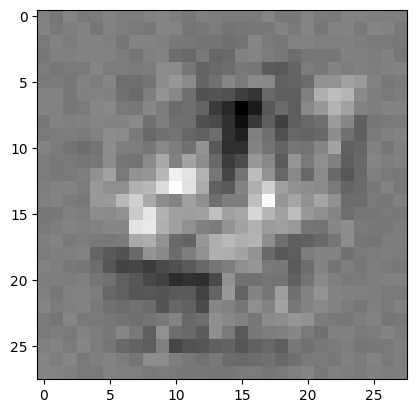

Época: 16/100 - perda: 0.10309372842311859 - acurácia: 0.992


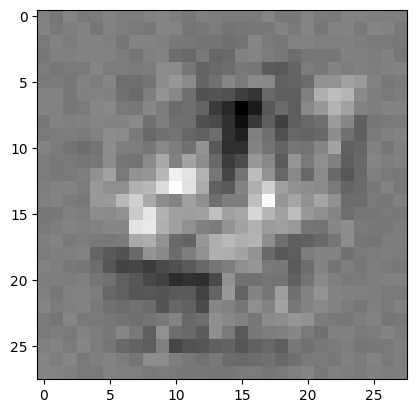

Época: 17/100 - perda: 0.1028825119137764 - acurácia: 0.992


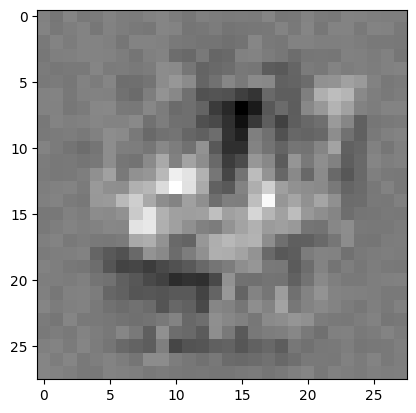

Época: 18/100 - perda: 0.10267208516597748 - acurácia: 0.992


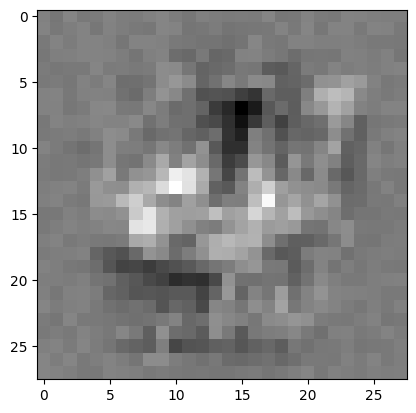

Época: 19/100 - perda: 0.10246243327856064 - acurácia: 0.992


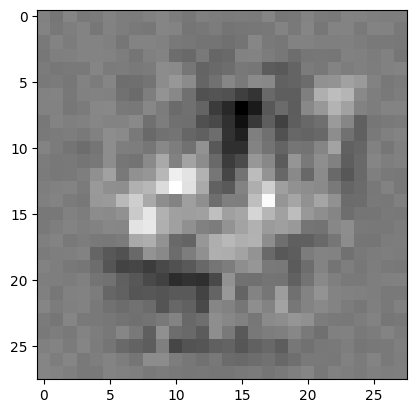

Época: 20/100 - perda: 0.10225354880094528 - acurácia: 0.992


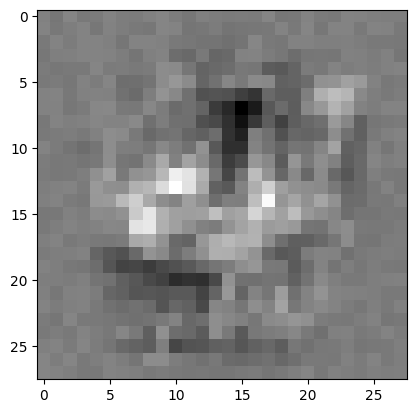

Época: 21/100 - perda: 0.102045439183712 - acurácia: 0.992


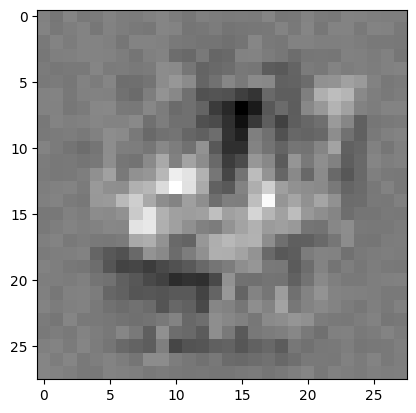

Época: 22/100 - perda: 0.10183810442686081 - acurácia: 0.992


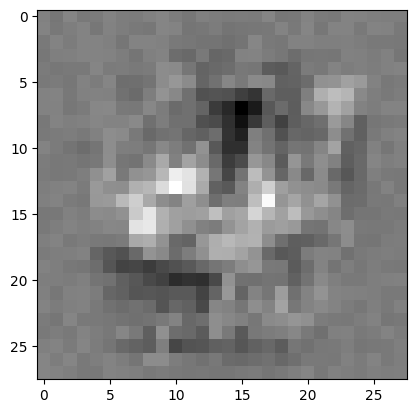

Época: 23/100 - perda: 0.1016315370798111 - acurácia: 0.992


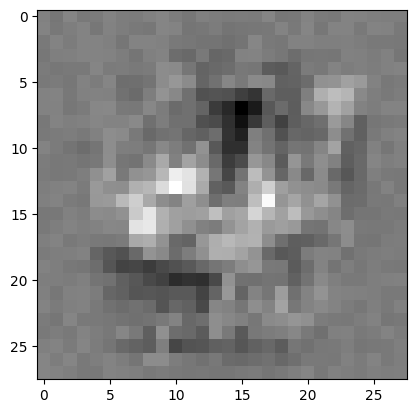

Época: 24/100 - perda: 0.10142570734024048 - acurácia: 0.992


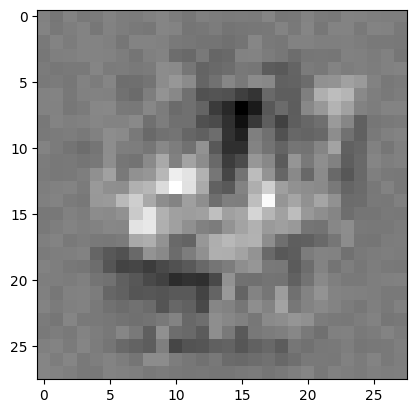

Época: 25/100 - perda: 0.10122063755989075 - acurácia: 0.992


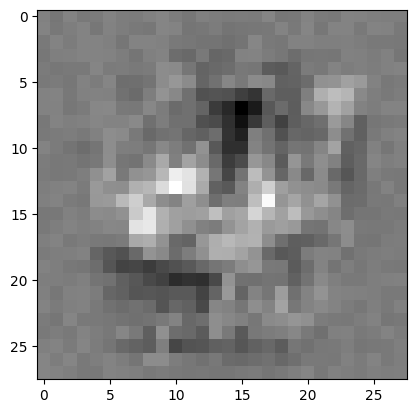

Época: 26/100 - perda: 0.1010163351893425 - acurácia: 0.992


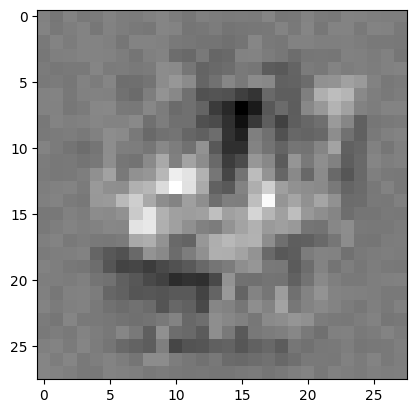

Época: 27/100 - perda: 0.10081276297569275 - acurácia: 0.993


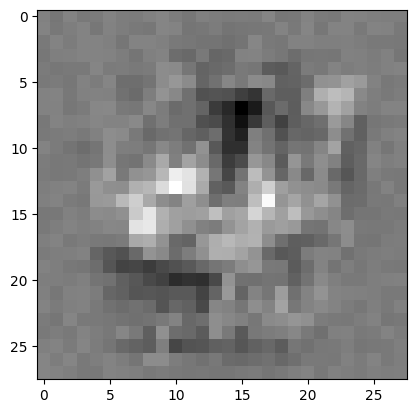

Época: 28/100 - perda: 0.1006099209189415 - acurácia: 0.993


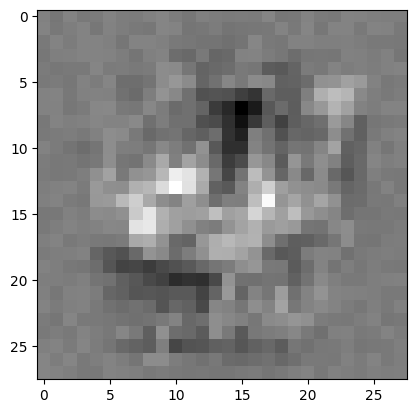

Época: 29/100 - perda: 0.10040783882141113 - acurácia: 0.994


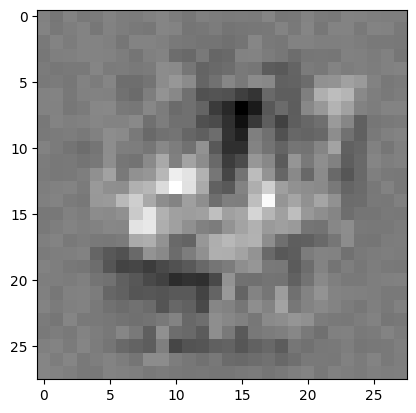

Época: 30/100 - perda: 0.10020646452903748 - acurácia: 0.994


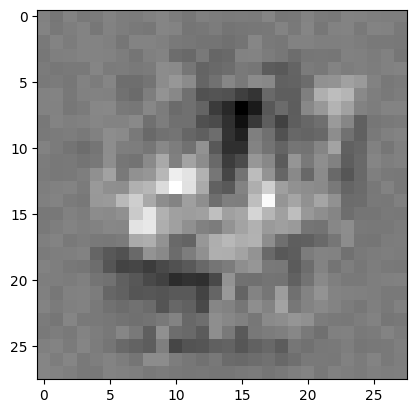

Época: 31/100 - perda: 0.1000058501958847 - acurácia: 0.994


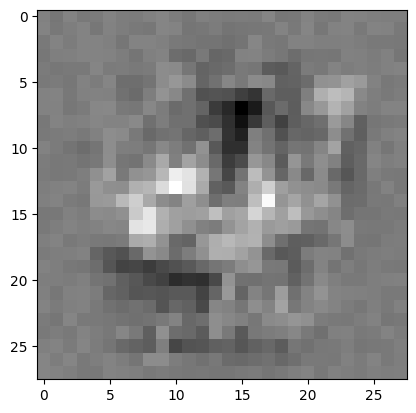

Época: 32/100 - perda: 0.09980596601963043 - acurácia: 0.994


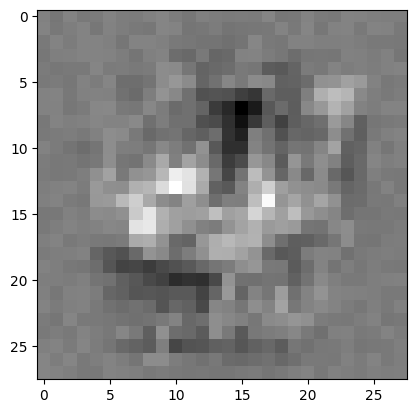

Época: 33/100 - perda: 0.09960678964853287 - acurácia: 0.994


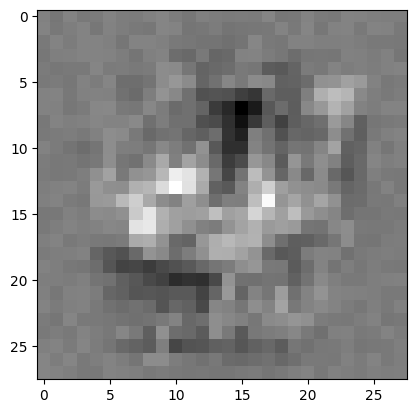

Época: 34/100 - perda: 0.09940832853317261 - acurácia: 0.994


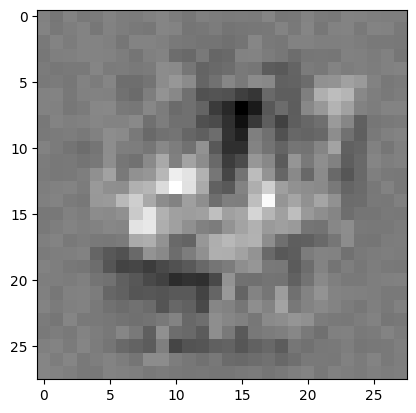

Época: 35/100 - perda: 0.09921060502529144 - acurácia: 0.994


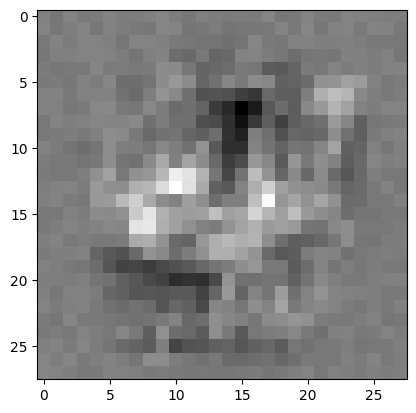

Época: 36/100 - perda: 0.09901358932256699 - acurácia: 0.994


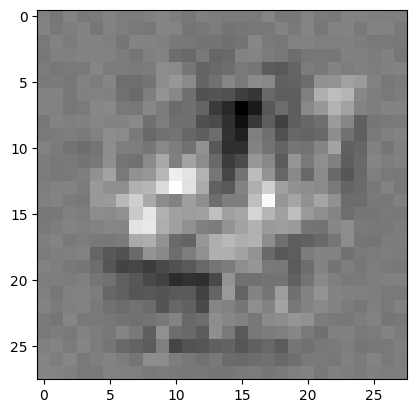

Época: 37/100 - perda: 0.09881727397441864 - acurácia: 0.994


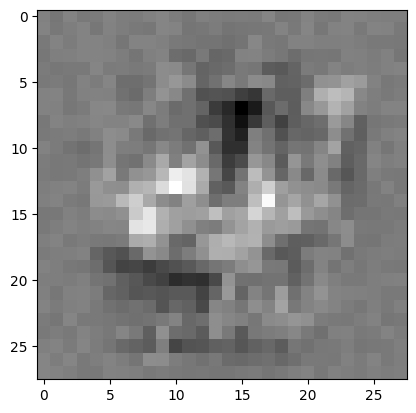

Época: 38/100 - perda: 0.0986216589808464 - acurácia: 0.994


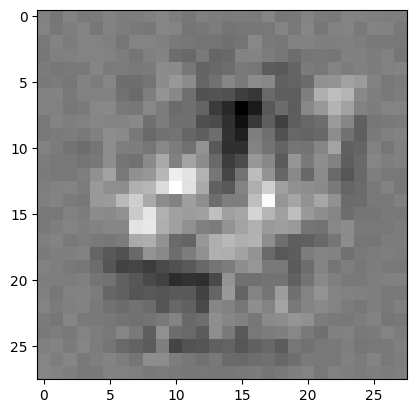

Época: 39/100 - perda: 0.09842675924301147 - acurácia: 0.994


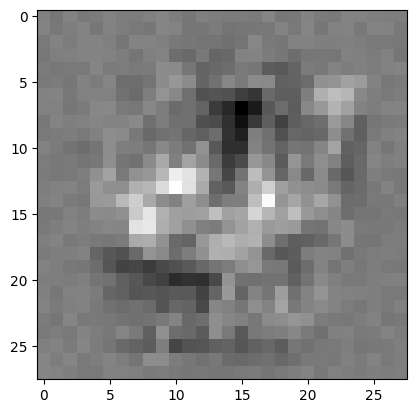

Época: 40/100 - perda: 0.09823255240917206 - acurácia: 0.994


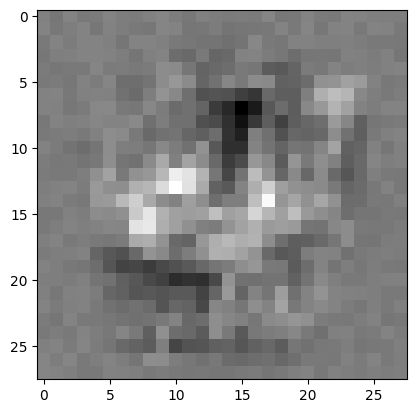

Época: 41/100 - perda: 0.09803903102874756 - acurácia: 0.994


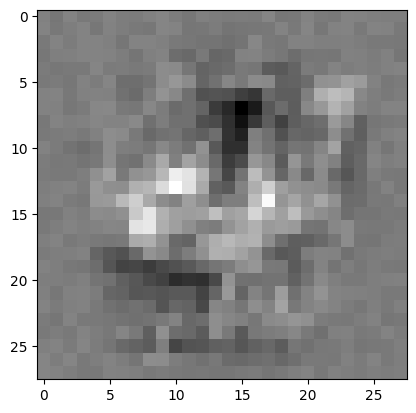

Época: 42/100 - perda: 0.09784621745347977 - acurácia: 0.994


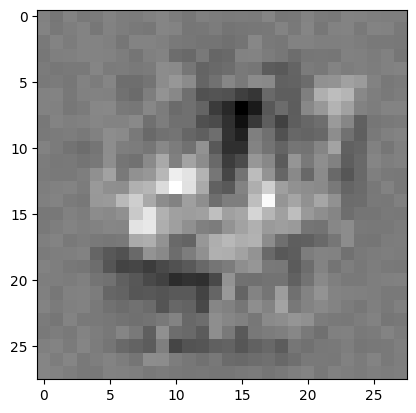

Época: 43/100 - perda: 0.09765408933162689 - acurácia: 0.994


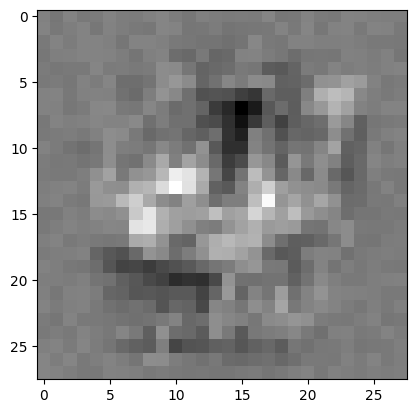

Época: 44/100 - perda: 0.09746263921260834 - acurácia: 0.994


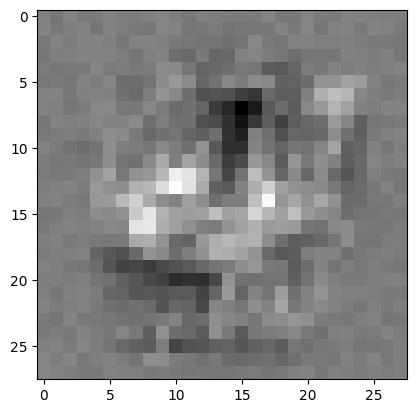

Época: 45/100 - perda: 0.0972718819975853 - acurácia: 0.994


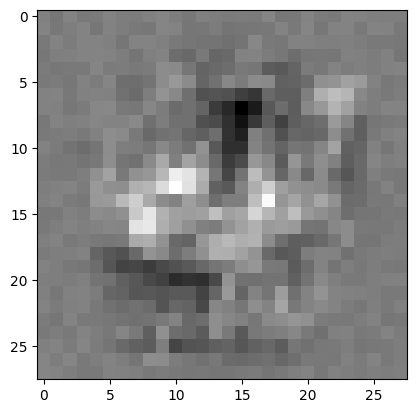

Época: 46/100 - perda: 0.09708179533481598 - acurácia: 0.994


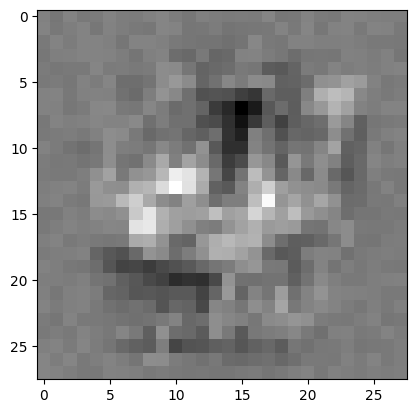

Época: 47/100 - perda: 0.09689237177371979 - acurácia: 0.994


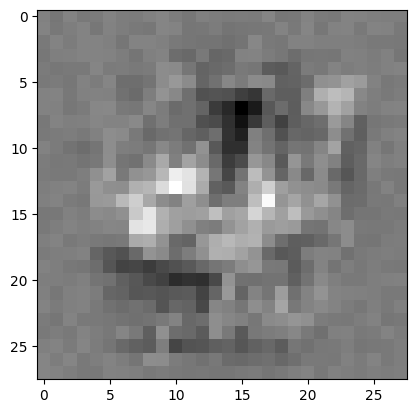

Época: 48/100 - perda: 0.09670363366603851 - acurácia: 0.994


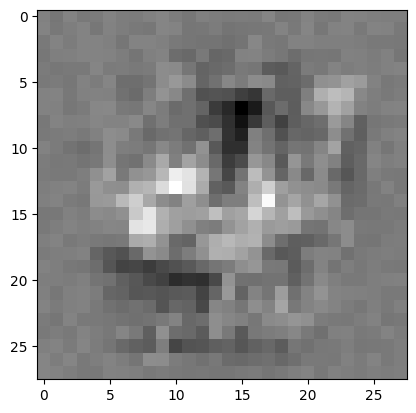

Época: 49/100 - perda: 0.09651556611061096 - acurácia: 0.994


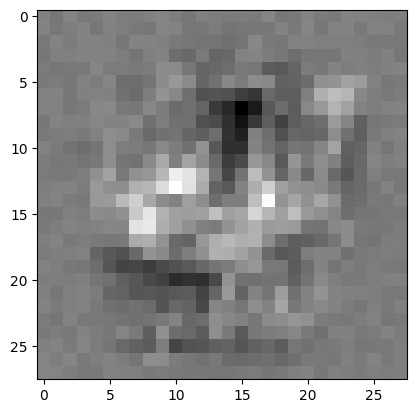

Época: 50/100 - perda: 0.09632814675569534 - acurácia: 0.994


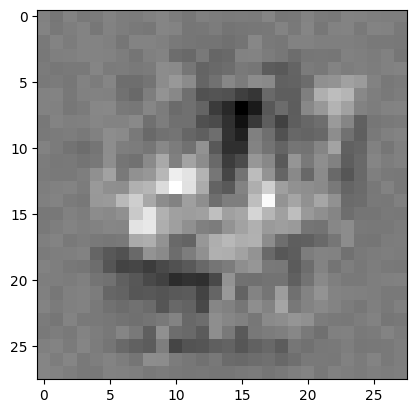

Época: 51/100 - perda: 0.09614139795303345 - acurácia: 0.994


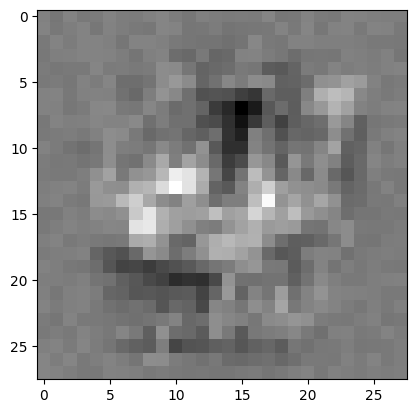

Época: 52/100 - perda: 0.09595531225204468 - acurácia: 0.994


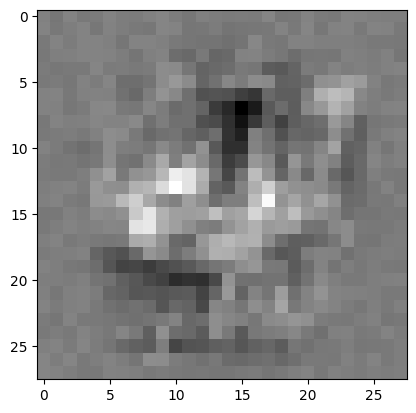

Época: 53/100 - perda: 0.09576987475156784 - acurácia: 0.994


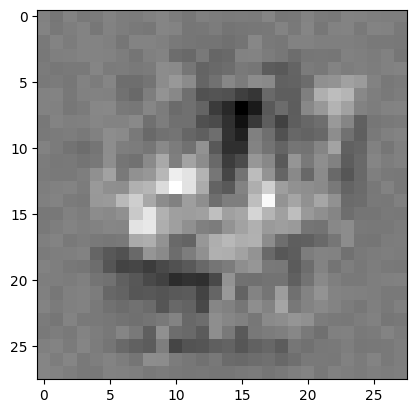

Época: 54/100 - perda: 0.09558509290218353 - acurácia: 0.994


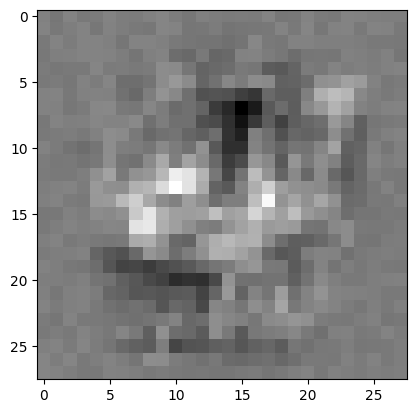

Época: 55/100 - perda: 0.09540095180273056 - acurácia: 0.994


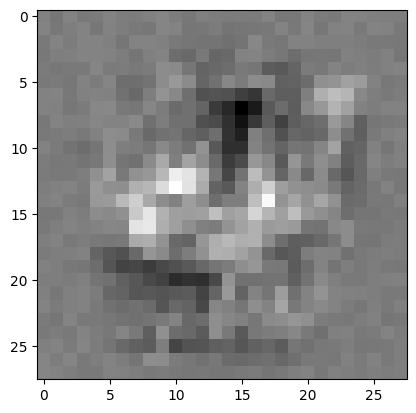

Época: 56/100 - perda: 0.09521745890378952 - acurácia: 0.994


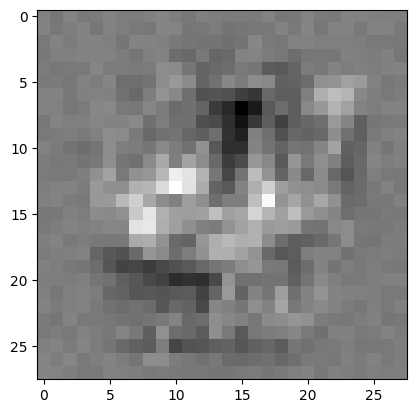

Época: 57/100 - perda: 0.09503461420536041 - acurácia: 0.994


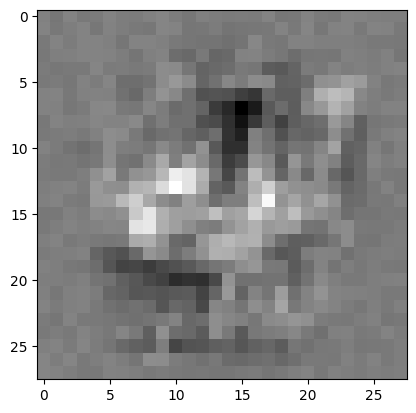

Época: 58/100 - perda: 0.09485241025686264 - acurácia: 0.994


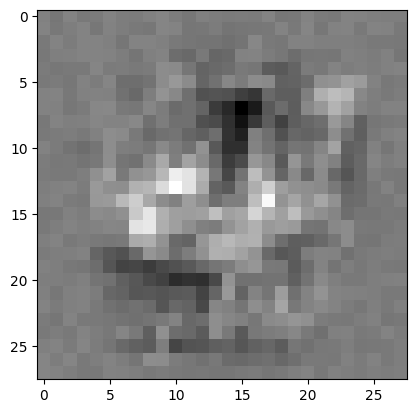

Época: 59/100 - perda: 0.0946708470582962 - acurácia: 0.994


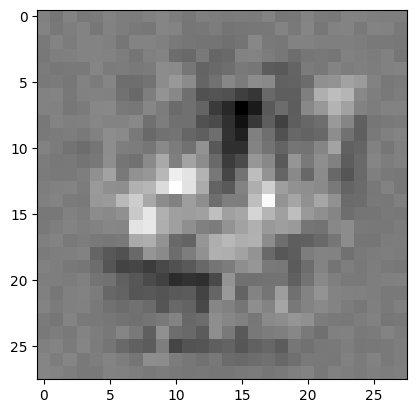

Época: 60/100 - perda: 0.09448988735675812 - acurácia: 0.994


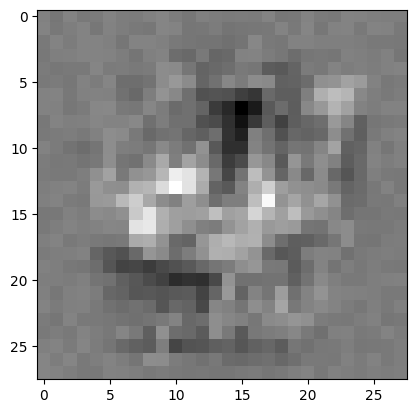

Época: 61/100 - perda: 0.09430957585573196 - acurácia: 0.994


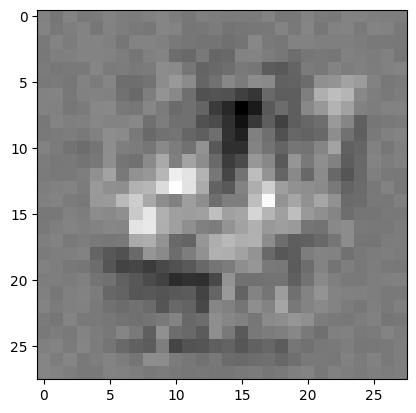

Época: 62/100 - perda: 0.09412989765405655 - acurácia: 0.994


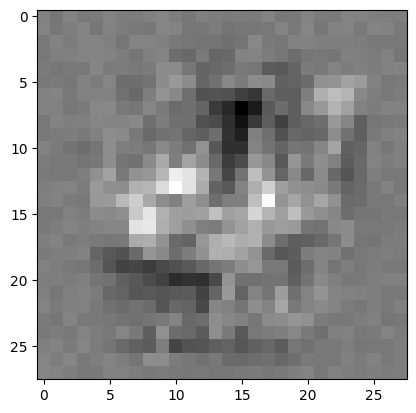

Época: 63/100 - perda: 0.09395084530115128 - acurácia: 0.994


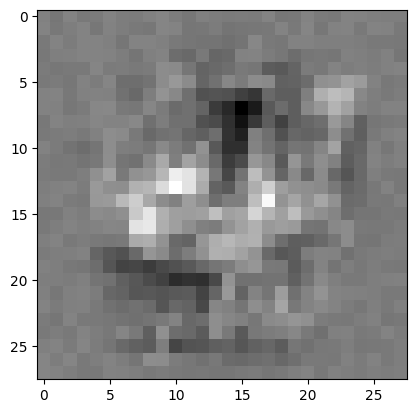

Época: 64/100 - perda: 0.09377239644527435 - acurácia: 0.994


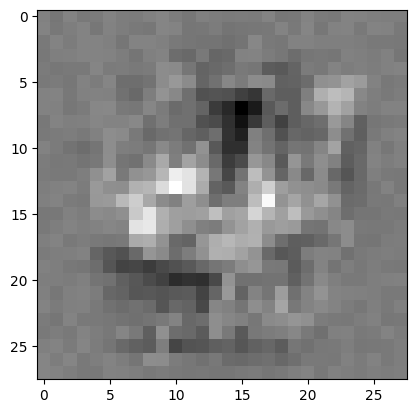

Época: 65/100 - perda: 0.09359457343816757 - acurácia: 0.994


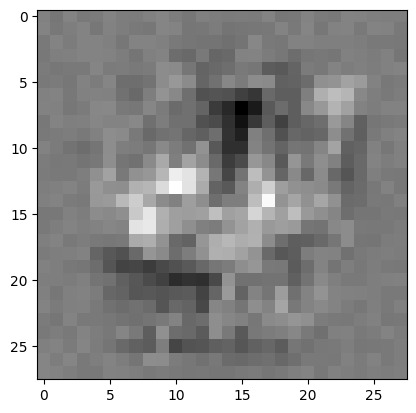

Época: 66/100 - perda: 0.09341738373041153 - acurácia: 0.994


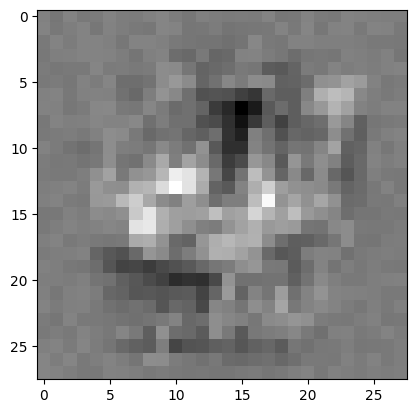

Época: 67/100 - perda: 0.09324077516794205 - acurácia: 0.994


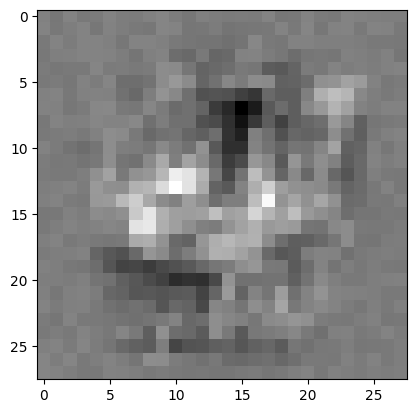

Época: 68/100 - perda: 0.0930647999048233 - acurácia: 0.994


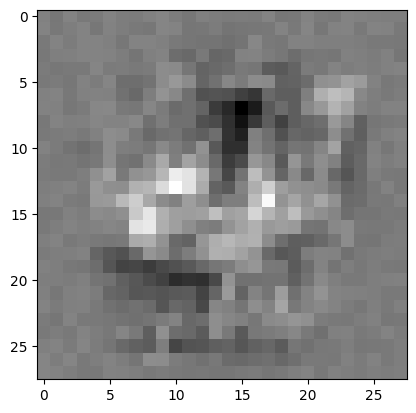

Época: 69/100 - perda: 0.09288940578699112 - acurácia: 0.994


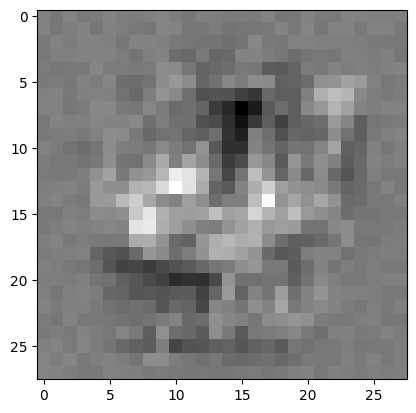

Época: 70/100 - perda: 0.09271463006734848 - acurácia: 0.995


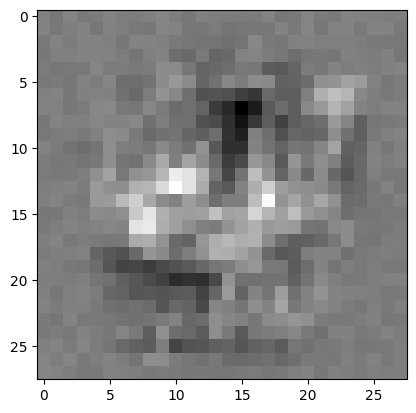

Época: 71/100 - perda: 0.09254045784473419 - acurácia: 0.995


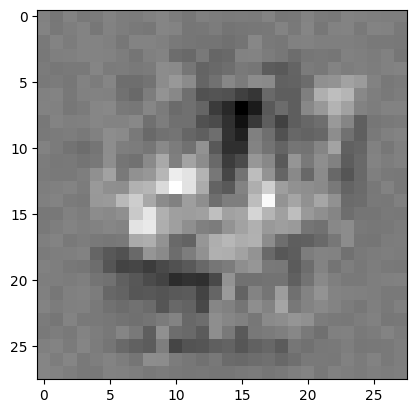

Época: 72/100 - perda: 0.09236686676740646 - acurácia: 0.995


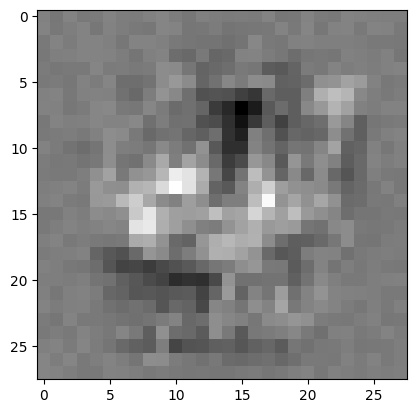

Época: 73/100 - perda: 0.09219389408826828 - acurácia: 0.995


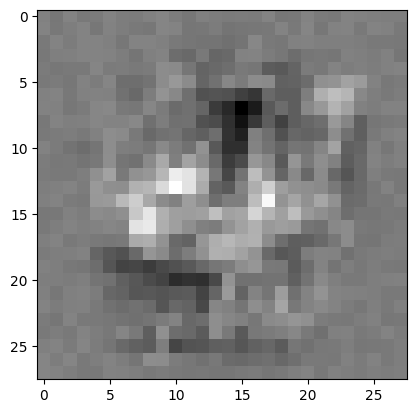

Época: 74/100 - perda: 0.09202151000499725 - acurácia: 0.995


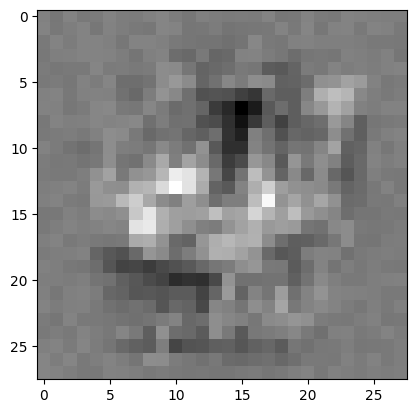

Época: 75/100 - perda: 0.09184969216585159 - acurácia: 0.995


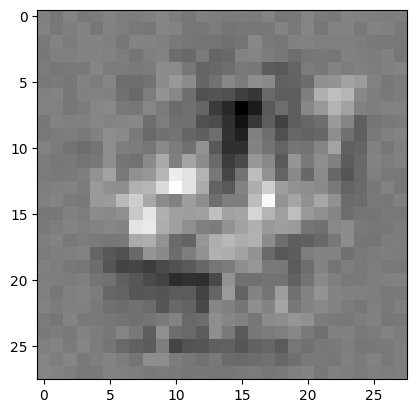

Época: 76/100 - perda: 0.09167847037315369 - acurácia: 0.995


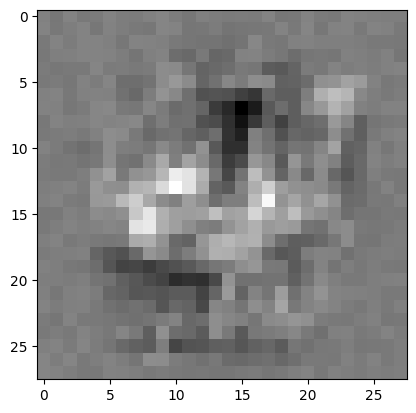

Época: 77/100 - perda: 0.09150783717632294 - acurácia: 0.995


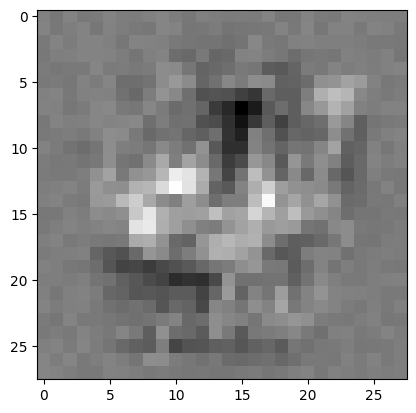

Época: 78/100 - perda: 0.09133779257535934 - acurácia: 0.995


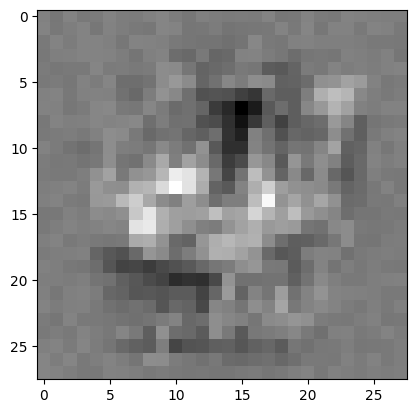

Época: 79/100 - perda: 0.09116829931735992 - acurácia: 0.995


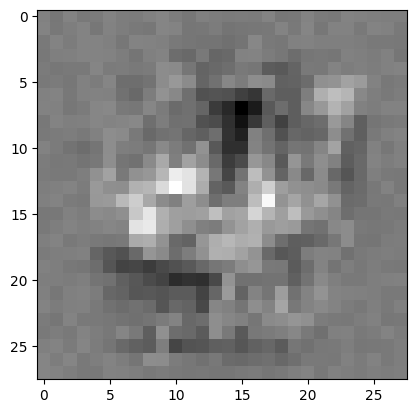

Época: 80/100 - perda: 0.09099938720464706 - acurácia: 0.995


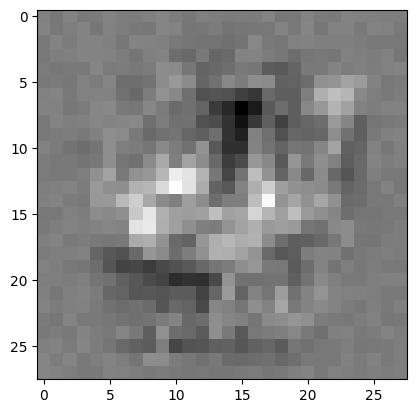

Época: 81/100 - perda: 0.09083106368780136 - acurácia: 0.995


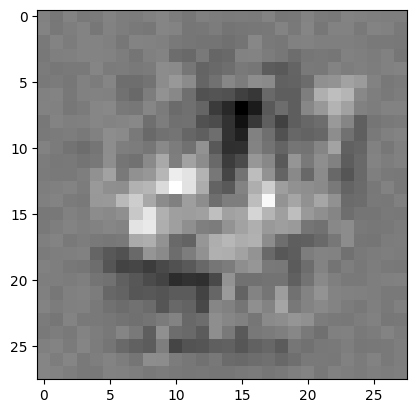

Época: 82/100 - perda: 0.09066329896450043 - acurácia: 0.995


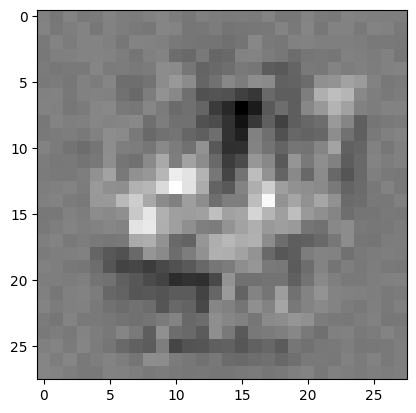

Época: 83/100 - perda: 0.09049610048532486 - acurácia: 0.995


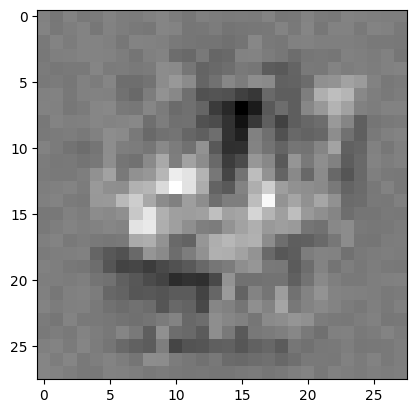

Época: 84/100 - perda: 0.09032948315143585 - acurácia: 0.995


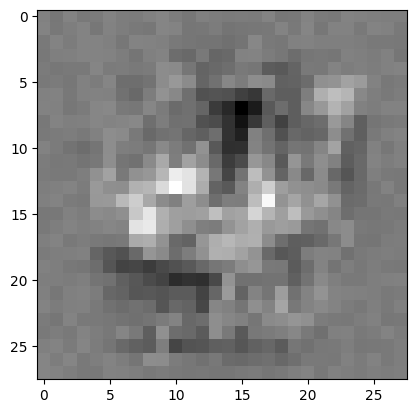

Época: 85/100 - perda: 0.09016340970993042 - acurácia: 0.995


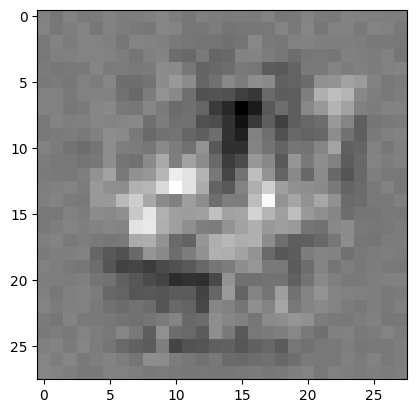

Época: 86/100 - perda: 0.08999789506196976 - acurácia: 0.995


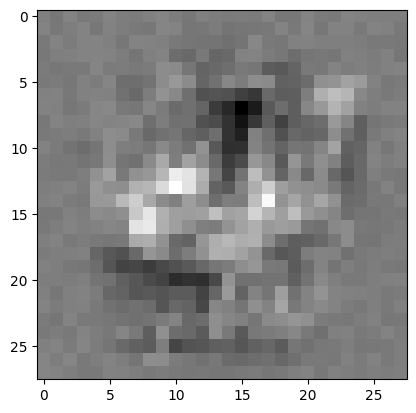

Época: 87/100 - perda: 0.08983295410871506 - acurácia: 0.995


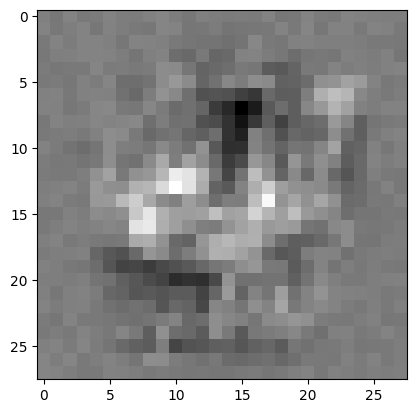

Época: 88/100 - perda: 0.08966854214668274 - acurácia: 0.995


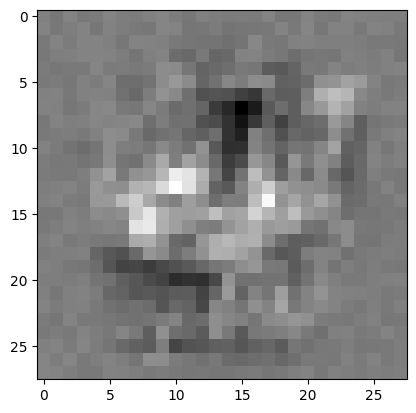

Época: 89/100 - perda: 0.08950471132993698 - acurácia: 0.995


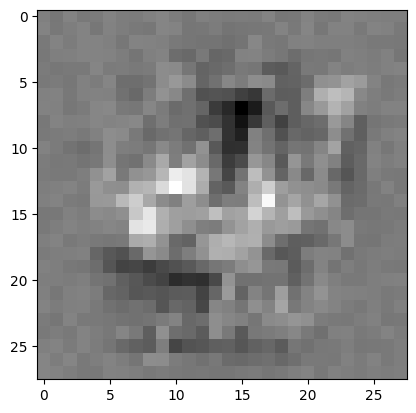

Época: 90/100 - perda: 0.0893414095044136 - acurácia: 0.995


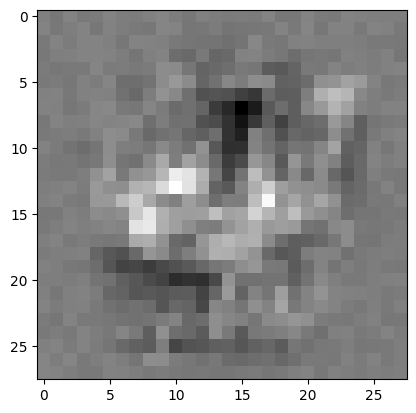

Época: 91/100 - perda: 0.0891786441206932 - acurácia: 0.995


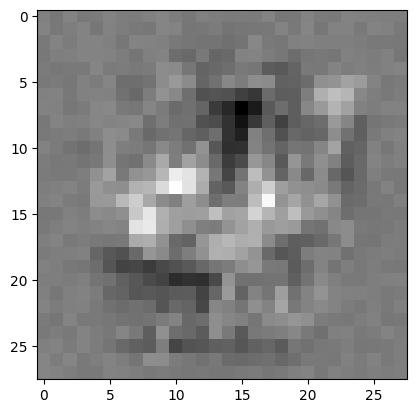

Época: 92/100 - perda: 0.08901645243167877 - acurácia: 0.995


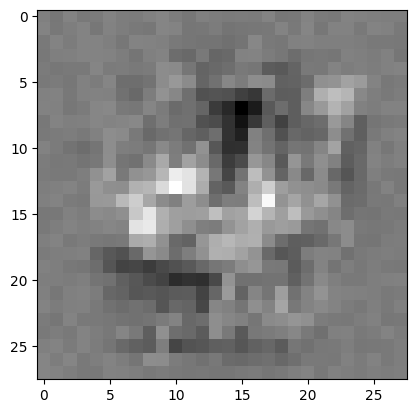

Época: 93/100 - perda: 0.08885478228330612 - acurácia: 0.995


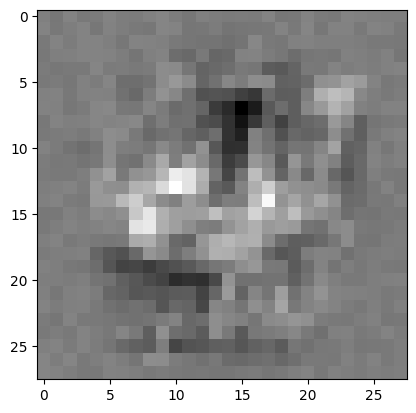

Época: 94/100 - perda: 0.08869363367557526 - acurácia: 0.995


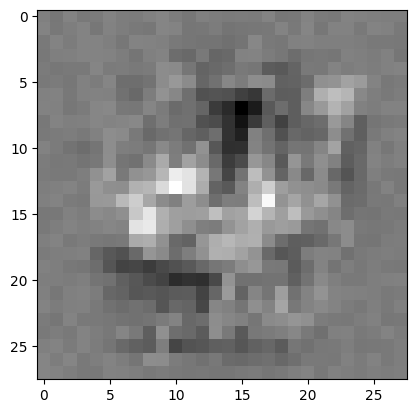

Época: 95/100 - perda: 0.08853305876255035 - acurácia: 0.995


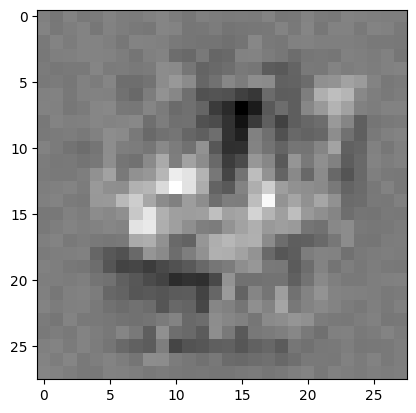

Época: 96/100 - perda: 0.08837299793958664 - acurácia: 0.995


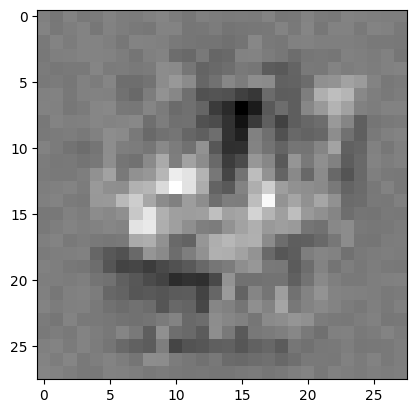

Época: 97/100 - perda: 0.0882134661078453 - acurácia: 0.995


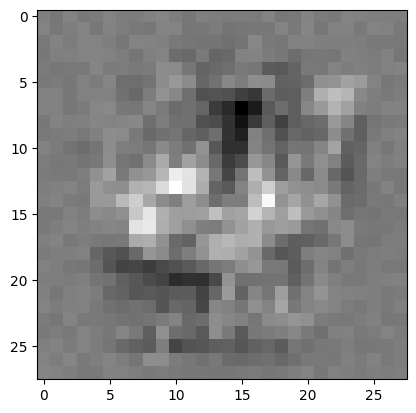

Época: 98/100 - perda: 0.08805446326732635 - acurácia: 0.995


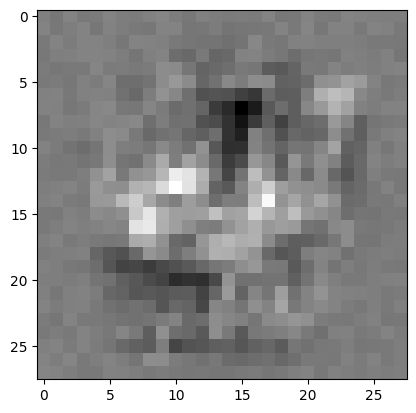

Época: 99/100 - perda: 0.08789599686861038 - acurácia: 0.995


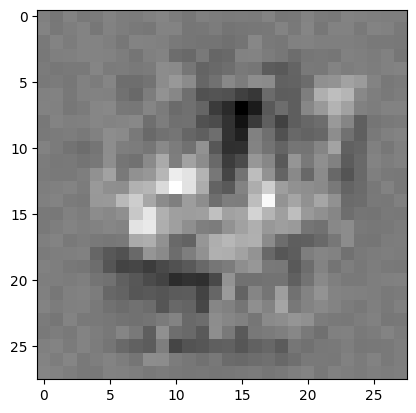

Época: 100/100 - perda: 0.0877380520105362 - acurácia: 0.996


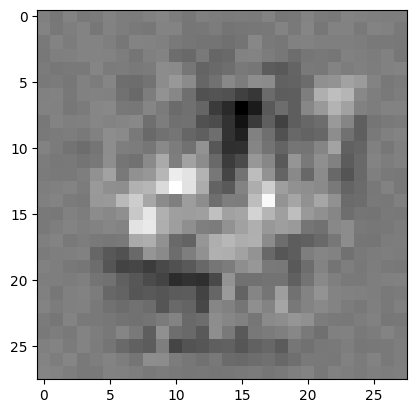

In [37]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    # vetor de score
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # vetor de perdas
    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()

    # Exercício 1
    print(f'Época: {i+1}/{epochs} - perda: {loss.data} - acurácia: {accuracy}')

    # Exercício 2
    weights = model.state_dict()['weight']
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()

<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
 - (1000, 28, 28).
 - 1000 épocas
 - Imagem com 28 x 28 pixels

2. Qual é o shape da saída da rede?
 - (1000, 10)
 - 1000 épocas
 - 10 classes (dígitos)
3. Qual é o número total de parâmetros da rede, incluindo o bias?
 - (28 \*28 \* 28 \*10 + 10) = 7850 parâmetros

# Aprendizados


- Foi interessante notar que, no laço de treinamento, o princípio do código para a predição da classificação ficou muito semelhante ao do dataset do Íris feito anteriormente.

- Apesar do valor da acurácia ter sido alta, para esse problema, isso não parece ser satisfatório, dada a quantidade de erros que podem ser observados na matrix de confusão que foi gerada.